# The very basics of machine (or statistical) learning



## Machine learning

Machine learning is a technique with a growing importance, as the size of the datasets experimental sciences are facing is rapidly growing. Problems it tackles range from building a prediction function linking different observations, to classifying observations, or learning the structure in an unlabeled dataset.


## Training set and testing set

In general, a learning problem considers a set of `n` samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or `features`.

Machine learning is about learning some properties of a data set and applying them to new data. This is why a common practice in machine learning to evaluate an algorithm is to split the data at hand into two sets, one that we call the **training set** on which we learn data properties and one that we call the **testing set** on which we test these properties.

## Cross validation 

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set `X_test`, `y_test`. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

## Reference on machine learning

[The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/)


# Machine learning with `scikit-learn`


`Scikit-learn` is a Python module integrating classic machine learning algorithms in the tightly-knit world of scientific Python packages (`NumPy`, `SciPy`, `matplotlib`).

## A simple example


### The data


A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the `.data` member, which is a `n_samples`, `n_features` array. In the case of supervised problem, one or more response variables are stored in the `.target` member.

For instance, in our case of the digits dataset, `digits.data` gives access to the features that can be used to classify the digits samples:

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


The `digits.target` gives the ground truth for the digit dataset, that is the number corresponding to each digit image that we are trying to learn:

In [4]:
from sklearn import datasets, svm
X_digits = digits.data
y_digits = digits.target

### Shape of the data arrays

The data is always a 2D array, shape (`n_samples`, `n_features`), although the original data may have had a different shape. In the case of the digits, each original sample is an image of shape (8, 8) and can be accessed using:

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

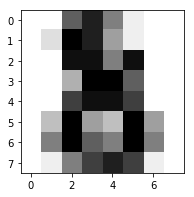

In [12]:
import matplotlib.pyplot as plt

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Fit the model

In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that implements the methods `fit(X, y)` and `predict(T)`.

An example of an estimator is the class `sklearn.svm.SVC` that implements support vector classification. The constructor of an estimator takes as arguments the parameters of the model, but for the time being, we will consider the estimator as a black box:

In [8]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf. (digits.data[:-1], digits.target[:-1])  

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Prediction

Now you can predict new values, in particular, we can ask to the classifier what is the digit of our last image in the digits dataset, which we have not used to train the classifier:

In [9]:
clf.predict(digits.data[-1:])


array([8])

In this example we set the value of gamma manually. It is possible to automatically find good values for the parameters by using tools such as **grid search** and **cross validation**.

# Cross validation 

In scikit-learn a random split into training and test sets can be quickly computed with the `train_test_split` helper function. Let’s load the iris data set to fit a linear support vector machine on it:

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

We can now quickly sample a training set while holding out 40% of the data for testing (evaluating) our classifier:


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape              

((60, 4), (60,))

We could build a model based on the training data

In [18]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train) 

The prediction score could then be applied to the testing data

In [20]:
clf.score(X_test, y_test)  

0.9666666666666667

When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, **there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally.** 

This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.


However, **by partitioning the available data into three sets, we drastically reduce the number of samples** which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.



The simplest way to use cross-validation is to call the `cross_val_score` helper function on the estimator and the dataset.

The following example demonstrates how to estimate the accuracy of a linear kernel support vector machine on the iris dataset by splitting the data, fitting a model and **computing the score 5 consecutive times (with different splits each time**):

In [21]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores                                              

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

The mean score and the 95% confidence interval of the score estimate are hence given by:

In [22]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


By default, the score computed at each CV iteration is the score method of the estimator. **It is possible to change this by using the scoring parameter**:

In [23]:
from sklearn import metrics
scores = cross_val_score(
    clf, iris.data, iris.target, cv=5, scoring='f1_macro')
scores                              

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

## Cross validation iterators

Assuming that some data is Independent and Identically Distributed (i.i.d.) is making the assumption that all samples stem from the same generative process and that the generative process is assumed to have no memory of past generated samples.

### `KFold`

KFold divides all the samples in k groups of samples, called folds (if k = n, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using k - 1 folds, and the fold left out is used for test.


In [29]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


Each fold is constituted by two arrays: the first one is related to the training set, and the second one to the test set. Thus, one can create the training/test sets using `numpy` indexing:

In [30]:
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 0, 1])
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

### `RepeatedKFold` 

`RepeatedKFold` repeats K-Fold `n` times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

Example of 2-fold K-Fold repeated 2 times:

In [31]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


Similarly, `RepeatedStratifiedKFold` repeats Stratified K-Fold n times with different randomization in each repetition.


### `LeaveOneOut`

LeaveOneOut (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for n samples, we have n different training sets and n different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set:

In [33]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


`LeavePOut` is very similar to `LeaveOneOut` as it creates all the possible training/test sets by removing p samples from the complete set. For n samples, this produces ${n \choose p}$ train-test pairs. Unlike LeaveOneOut and KFold, the test sets will overlap for $p > 1$.

In [34]:
from sklearn.model_selection import LeavePOut

X = np.ones(4)
lpo = LeavePOut(p=2)
for train, test in lpo.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[1 3] [0 2]
[1 2] [0 3]
[0 3] [1 2]
[0 2] [1 3]
[0 1] [2 3]


###  Cross validation of time series data

Time series data is characterised by the correlation between observations that are near in time (autocorrelation). However, classical cross-validation techniques such as `KFold` and `ShuffleSplit` assume the samples are independent and identically distributed, and would result in unreasonable correlation between training and testing instances (yielding poor estimates of generalisation error) on time series data. Therefore, it is very important to evaluate our model for time series data on the “future” observations least like those that are used to train the model. To achieve this, one solution is provided by `TimeSeriesSplit`.

Example of 3-split time series cross-validation on a dataset with 6 samples:


In [36]:
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)  

for train, test in tscv.split(X):
    print("%s %s" % (train, test))


TimeSeriesSplit(max_train_size=None, n_splits=3)
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]


## Obtaining predictions by cross-validation

The function `cross_val_predict` has a similar interface to `cross_val_score`, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set. Only cross-validation strategies that assign all elements to a test set exactly once can be used (otherwise, an exception is raised).

In [26]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(clf, iris.data, iris.target, cv=10)

In [27]:
print(predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [28]:
metrics.accuracy_score(iris.target, predicted) 

0.9733333333333334

#  Using Grid Search for the optimal hyperparameters of the model

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include `C`, `kernel` and `gamma` for Support Vector Classifier, alpha for Lasso, etc.

It is possible and recommended to search the hyper-parameter space for the best cross validation score.


A search consists of:

- an estimator (regressor or classifier such as sklearn.svm.SVC());
- a parameter space;
- a method for searching or sampling candidates;
- a cross-validation scheme; and
- a score function.

Some models allow for specialized, efficient parameter search strategies, outlined below. Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, `GridSearchCV` exhaustively considers all parameter combinations, while `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution.

Note that it is common that a small subset of those parameters can have a large impact on the predictive or computation performance of the model while others can be left to their default values. 


The grid search provided by `GridSearchCV` exhaustively generates candidates from a grid of parameter values specified with the `param_grid` parameter. For instance, the following `param_grid`:

In [37]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [38]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

## Example for `GridSearchCV`

This examples shows how a classifier is optimized by cross-validation, which is done using the `sklearn.model_selection.GridSearchCV` object on a development set that comprises only half of the available labeled data.

The performance of the selected hyper-parameters and trained model is then measured on a dedicated evaluation set that was not used during the model selection step.

We firstly load the Digits dataset.To apply an classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:

In [42]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

## print(__doc__)

digits = datasets.load_digits()

n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

We then split the dataset in two equal parts.  We also set the parameters by cross-validation

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

Then we tune hyper-parameters with different scores

In [44]:
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed o

# Feature selection

The classes in the `sklearn.feature_selection` module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

## Removing features with low variance


`VarianceThreshold` is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by

$$\mathrm{Var}[X] = p(1 - p)$$

so we can select using the threshold $.8 \times (1 - .8)$. `VarianceThreshold` has removed the first column, which has a probability $p = 5/6 > .8$ of containing a zero.

In [45]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

## Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

- `SelectKBest` removes all but the k highest scoring features
- `SelectPercentile` removes all but a user-specified highest scoring percentage of features using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.
- `GenericUnivariateSelect` allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.
For instance, we can perform a $\chi^2$ test to the samples to retrieve only the two best features as follows:

In [46]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X, y = iris.data, iris.target
X.shape

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

## Tree-based feature selection
Tree-based estimators (see the `sklearn.tree` module and forest of trees in the `sklearn.ensemble` module) can be used to compute feature importances, which in turn can be used to discard irrelevant features (when coupled with the `sklearn.feature_selection.SelectFromModel` meta-transformer):

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
X.shape

clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               

(150, 2)

## L1-based feature selection

Linear models penalized with the **L1 norm** have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with `feature_selection.SelectFromModel` to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the linear_model.Lasso for regression, and of `linear_model.LogisticRegression` and `svm.LinearSVC` for classification. With SVMs and logistic-regression, the parameter `C` controls the sparsity: the smaller `C` the fewer features selected. With Lasso, the higher the `alpha` parameter, the fewer features selected.


In [49]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 3)